# 1. Data Understanding

### 1.1 Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load the dataset
df = pd.read_csv("Ecommerce_Customer_Insights_Dirty.csv")


### 1.2 Preview Data

In [4]:
# First 5 rows
df.head()


,Customer_ID,Name,Email,Phone,Gender,DOB,Signup_Date,Last_Purchase_Date,Product_ID,Product_Name,Category,Quantity,Price,Payment_Mode,City,State,Returned
0,9576,Brandon Guerra,tonyafrank@gmail.com,298.976.9930x576,Unknown,1981-09-01,2023-08-09,2024-12-21,666,Laptop,Fashion,NaN,500.0,card,Mumbai,Telangana,N
1,9723,Elizabeth Gonzales,ogoodman@gmail.com,008.792.4027x647,F,1988-03-15,2023-10-23,2025-05-21,988,Headphones,Accessories,1.0,NaN,UPI,Hyderabad,West Bengal,Y
2,7650,Kenneth Chambers,qrusso@gmail.com,NaN,F,1997-02-18,2025-09-14,2025-07-18,147,Bag,Accessories,4.0,NaN,Cash,Pune,Delhi,No
3,9437,Debra Bowman,matthew74@jenkins.com,701.196.4177x24092,Unknown,1991-09-13,2024-01-05,2024-12-05,734,Phone,Electronics,NaN,500.0,cc,Kolkata,Telangana,N
4,1695,Ms. Denise Davis,theodore12@hotmail.com,165-004-6950,Female,1996-08-21,2025-04-19,2025-05-31,413,Camera,Accessories,3.0,-50.0,UPI,Bangalore,Karnataka,NaN


In [5]:
# Last 5 rows
df.tail()

,Customer_ID,Name,Email,Phone,Gender,DOB,Signup_Date,Last_Purchase_Date,Product_ID,Product_Name,Category,Quantity,Price,Payment_Mode,City,State,Returned
4995,4375,Megan Jones,bhale@kennedy.net,NaN,F,1967-12-22,2024-02-19,2024-11-17,153,Phone,Fashion,-1.0,NaN,UPI,Hyderabad,Karnataka,N
4996,1641,Scott Davis,scott33@yahoo.com,287-388-9207x418,F,1986-01-11,2025-09-10,NaN,219,Watch,Fashion,4.0,-50.0,UPI,Delhi,West Bengal,Yes
4997,8319,Daniel Hicks,karenbaldwin@williamson.net,+1-405-162-4408x137,Male,1978-07-08,2024-06-11,2025-03-23,638,Phone,Fashion,2.0,NaN,cc,Pune,West Bengal,Y
4998,5913,Charlene Lee,elizabeth04@hotmail.com,+1-309-626-9612,Unknown,1972-04-19,2024-03-11,2025-05-24,256,Camera,Accessories,3.0,200.0,Cash,Delhi,Telangana,Yes
4999,8357,Eric Palmer,NaN,9807542503,F,1963-01-26,2023-02-18,NaN,926,Phone,Accessories,2.0,500.0,Debit Card,Bangalore,Maharashtra,NaN


### 1.3 Dataset Shape

In [6]:
print("Dataset Shape:", df.shape)


Dataset Shape: (5000, 17)


### 1.4 Column Info

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         5000 non-null   int64  
 1   Name                5000 non-null   object 
 2   Email               4504 non-null   object 
 3   Phone               4523 non-null   object 
 4   Gender              5000 non-null   object 
 5   DOB                 5000 non-null   object 
 6   Signup_Date         5000 non-null   object 
 7   Last_Purchase_Date  4509 non-null   object 
 8   Product_ID          5000 non-null   int64  
 9   Product_Name        5000 non-null   object 
 10  Category            5000 non-null   object 
 11  Quantity            4157 non-null   float64
 12  Price               4201 non-null   float64
 13  Payment_Mode        5000 non-null   object 
 14  City                5000 non-null   object 
 15  State               5000 non-null   object 
 16  Return

### 1.5 Statistical Overview

In [8]:
df.describe()

,Customer_ID,Product_ID,Quantity,Price
count,5000.000000,5000.000000,4157.000000,4201.000000
mean,5555.018400,550.653600,1.838826,629.409664
std,2596.760117,260.674209,1.693844,560.689188
min,1000.000000,100.000000,-1.000000,-50.000000
25%,3335.750000,320.000000,1.000000,200.000000
50%,5601.500000,551.500000,2.000000,500.000000
75%,7782.750000,775.250000,3.000000,1000.000000
max,9999.000000,999.000000,4.000000,1500.000000


### 1.6 Missing Values

In [9]:
print("Missing Values:\n")
df.isnull().sum()

Missing Values:



Customer_ID             0
Name                    0
Email                 496
Phone                 477
Gender                  0
DOB                     0
Signup_Date             0
Last_Purchase_Date    491
Product_ID              0
Product_Name            0
Category                0
Quantity              843
Price                 799
Payment_Mode            0
City                    0
State                   0
Returned              956
dtype: int64

### 1.7 Duplicates

In [10]:
print("Duplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


# 2. Data Cleaning / Preprocessing

In [11]:
# Percentage of missing values per column
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent.sort_values(ascending=False)  # sort descending
print(missing_percent)

Returned              19.12
Quantity              16.86
Price                 15.98
Email                  9.92
Last_Purchase_Date     9.82
Phone                  9.54
Category               0.00
State                  0.00
City                   0.00
Payment_Mode           0.00
Customer_ID            0.00
Product_Name           0.00
Name                   0.00
Signup_Date            0.00
DOB                    0.00
Gender                 0.00
Product_ID             0.00
dtype: float64


In [12]:
# Show only columns with missing values
missing_columns = df.columns[df.isnull().any()]
missing_columns


Index(['Email', 'Phone', 'Last_Purchase_Date', 'Quantity', 'Price',
       'Returned'],
      dtype='object')

In [13]:
missing_data = df.isnull().sum()[df.isnull().sum() > 0]
missing_percent = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent.round(2)
})
missing_summary


,Missing Values,Percentage (%)
Email,496,9.92
Phone,477,9.54
Last_Purchase_Date,491,9.82
Quantity,843,16.86
Price,799,15.98
Returned,956,19.12


### 2.1 Handling Missing Values

In [14]:
df.drop(['Email', 'Phone'], axis=1, inplace=True)

In [15]:
df['Last_Purchase_Date'].fillna('No Purchase', inplace=True)

In [16]:
df['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df['Price'].fillna(df['Price'].median(), inplace=True)


In [17]:
df['Returned'].fillna('No', inplace=True)


In [18]:
df.isnull().sum()


Customer_ID           0
Name                  0
Gender                0
DOB                   0
Signup_Date           0
Last_Purchase_Date    0
Product_ID            0
Product_Name          0
Category              0
Quantity              0
Price                 0
Payment_Mode          0
City                  0
State                 0
Returned              0
dtype: int64

### 2.2 Data Cleaning and Feature Correction

### Step 1: Convert date columns to datetime

In [19]:
df['Signup_Date'] = pd.to_datetime(df['Signup_Date'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Last_Purchase_Date'] = pd.to_datetime(df['Last_Purchase_Date'], errors='coerce')


### Step 2: Check and fix numeric columns

In [20]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


### Step 3: Check for duplicates

In [21]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

df.drop_duplicates(inplace=True)


Duplicate Rows: 0


### Step 4: Standardize text columns

In [22]:
text_columns = ['Gender', 'Category', 'Payment_Mode', 'State', 'City']
for col in text_columns:
    df[col] = df[col].str.title().str.strip()


### Step 5: Create new derived columns

In [23]:
df['Total_Spend'] = df['Quantity'] * df['Price']

In [24]:
today = pd.Timestamp.today()
df['Customer_Age'] = (today.year - df['DOB'].dt.year)

In [25]:
df['Days_Since_Signup'] = (today - df['Signup_Date']).dt.days

In [26]:
df['Days_Since_Signup'] = (today - df['Signup_Date']).dt.days

In [27]:
df.head()

,Customer_ID,Name,Gender,DOB,Signup_Date,Last_Purchase_Date,Product_ID,Product_Name,Category,Quantity,Price,Payment_Mode,City,State,Returned,Total_Spend,Customer_Age,Days_Since_Signup
0,9576,Brandon Guerra,Unknown,1981-09-01,2023-08-09,2024-12-21,666,Laptop,Fashion,2.0,500.0,Card,Mumbai,Telangana,N,1000.0,44,816
1,9723,Elizabeth Gonzales,F,1988-03-15,2023-10-23,2025-05-21,988,Headphones,Accessories,1.0,500.0,Upi,Hyderabad,West Bengal,Y,500.0,37,741
2,7650,Kenneth Chambers,F,1997-02-18,2025-09-14,2025-07-18,147,Bag,Accessories,4.0,500.0,Cash,Pune,Delhi,No,2000.0,28,49
3,9437,Debra Bowman,Unknown,1991-09-13,2024-01-05,2024-12-05,734,Phone,Electronics,2.0,500.0,Cc,Kolkata,Telangana,N,1000.0,34,667
4,1695,Ms. Denise Davis,Female,1996-08-21,2025-04-19,2025-05-31,413,Camera,Accessories,3.0,-50.0,Upi,Bangalore,Karnataka,No,-150.0,29,197


In [28]:
numeric_cols = ['Quantity', 'Price', 'Total_Spend', 'Customer_Age']


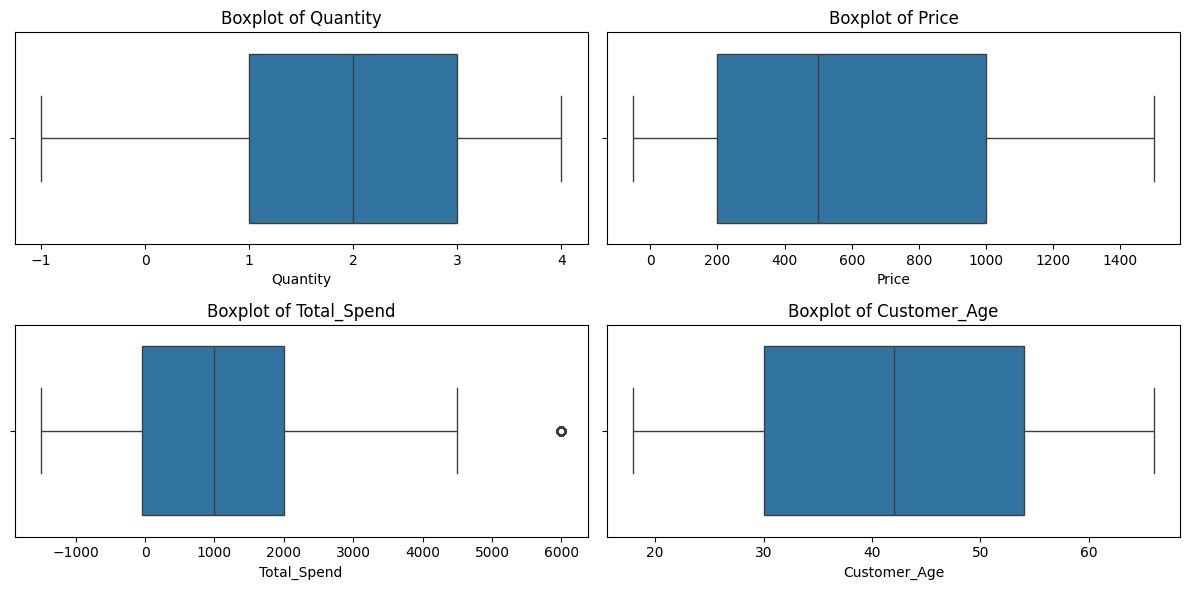

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [30]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col}: {len(outliers)} outliers")


Quantity: 0 outliers
Price: 0 outliers
Total_Spend: 140 outliers
Customer_Age: 0 outliers


In [31]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))


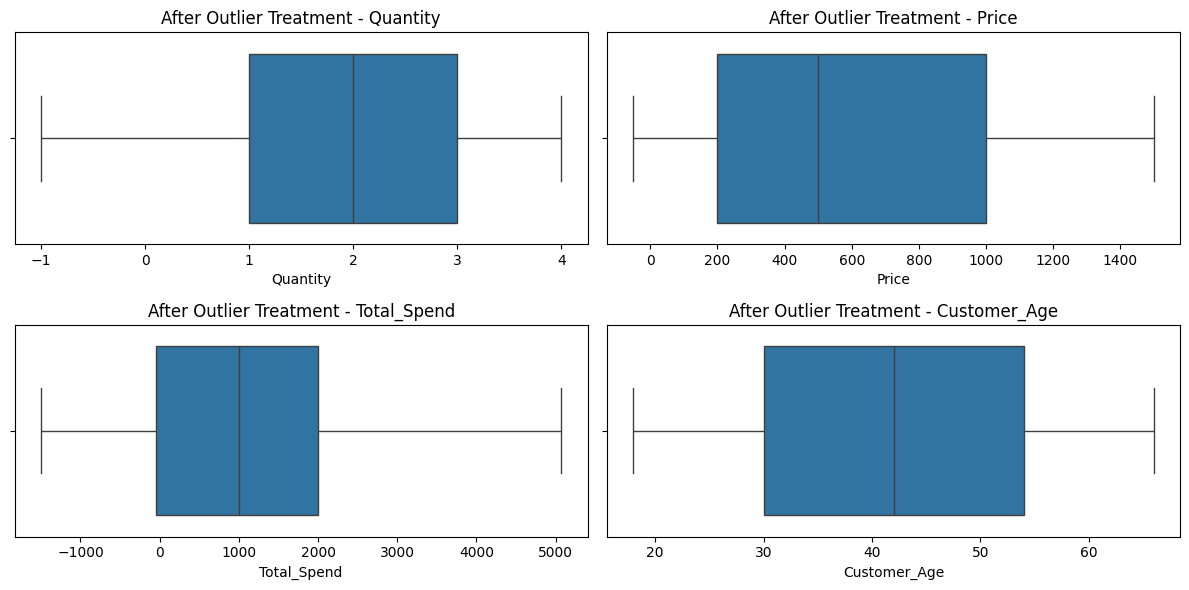

In [32]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'After Outlier Treatment - {col}')
plt.tight_layout()
plt.show()


# 3 Exploratory Data Analysis (EDA)

In [33]:
num_cols = ['Quantity', 'Price', 'Total_Spend', 'Customer_Age', 'Days_Since_Signup']
df[num_cols].describe()


,Quantity,Price,Total_Spend,Customer_Age,Days_Since_Signup
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,1.866000,608.730000,1108.760000,41.788400,555.51140
std,1.545614,516.114873,1472.891932,13.818966,317.69554
min,-1.000000,-50.000000,-1500.000000,18.000000,11.00000
25%,1.000000,200.000000,-50.000000,30.000000,277.00000
50%,2.000000,500.000000,1000.000000,42.000000,549.00000
75%,3.000000,1000.000000,2000.000000,54.000000,833.00000
max,4.000000,1500.000000,5075.000000,66.000000,1106.00000


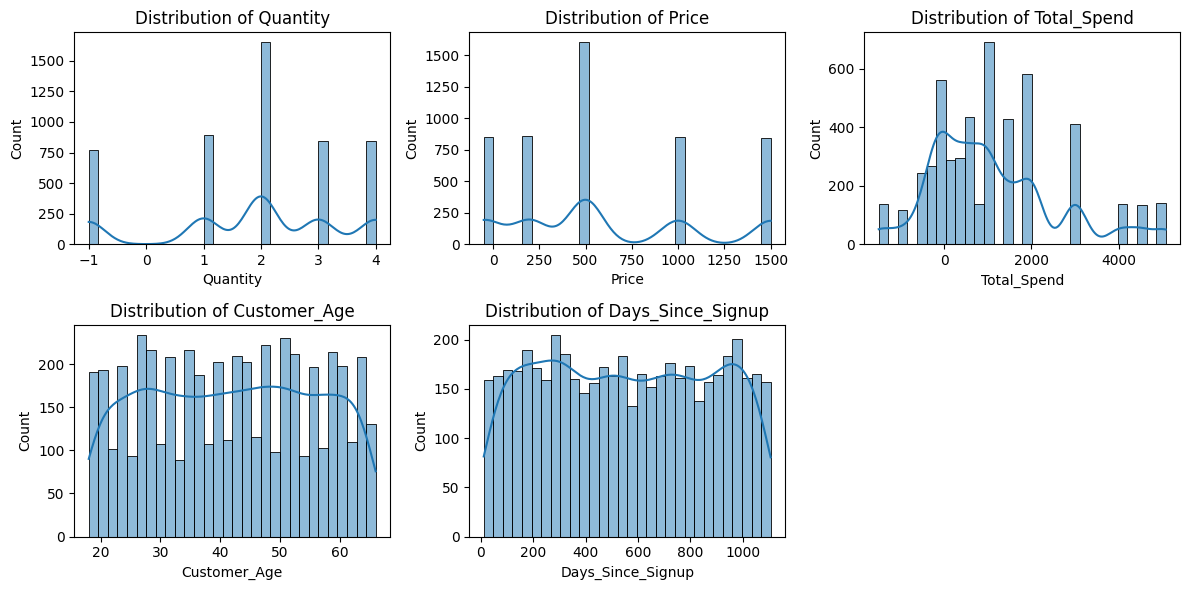

In [34]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [35]:
cat_cols = ['Gender', 'Category', 'Payment_Mode', 'Returned', 'State']
for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts(normalize=True).round(2) * 100)



Gender:
 Gender
Unknown    20.0
F          20.0
Male       20.0
M          20.0
Female     20.0
Name: proportion, dtype: float64

Category:
 Category
Fashion        34.0
Electronics    33.0
Accessories    33.0
Name: proportion, dtype: float64

Payment_Mode:
 Payment_Mode
Credit Card    17.0
Debit Card     17.0
Upi            17.0
Cc             17.0
Card           17.0
Cash           16.0
Name: proportion, dtype: float64

Returned:
 Returned
No     39.0
Yes    20.0
Y      20.0
N      20.0
Name: proportion, dtype: float64

State:
 State
Telangana      21.0
West Bengal    20.0
Delhi          20.0
Karnataka      20.0
Maharashtra    20.0
Name: proportion, dtype: float64


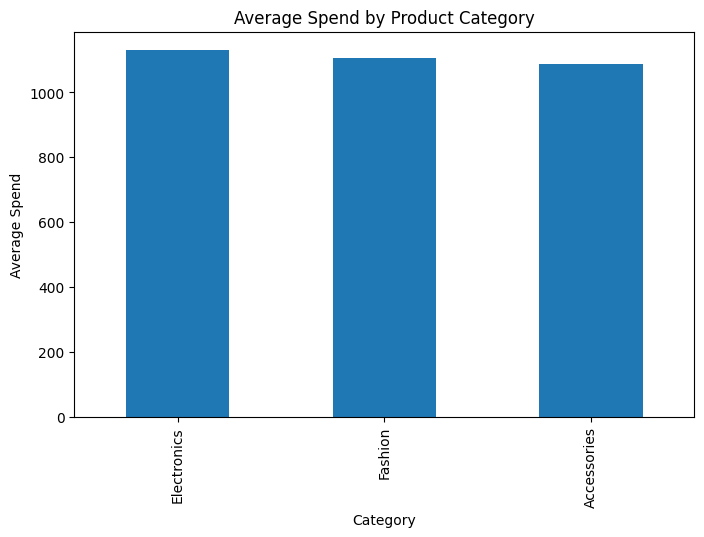

In [36]:
avg_spend = df.groupby('Category')['Total_Spend'].mean().sort_values(ascending=False)
avg_spend.plot(kind='bar', figsize=(8,5), title='Average Spend by Product Category')
plt.ylabel('Average Spend')
plt.show()


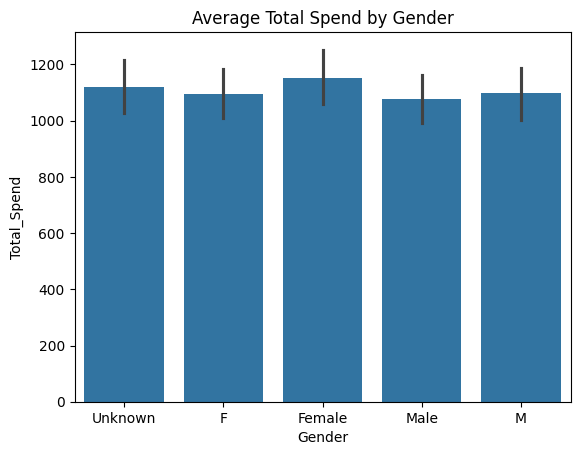

In [37]:
sns.barplot(x='Gender', y='Total_Spend', data=df, estimator=np.mean)
plt.title('Average Total Spend by Gender')
plt.show()


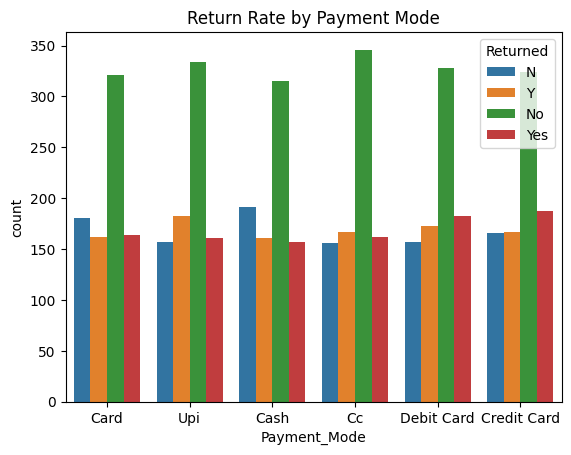

In [38]:
sns.countplot(x='Payment_Mode', hue='Returned', data=df)
plt.title('Return Rate by Payment Mode')
plt.show()


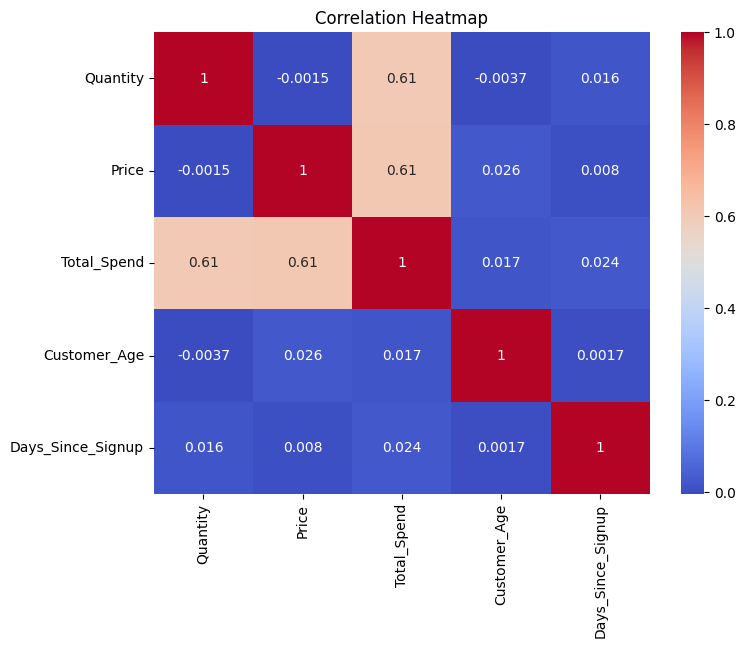

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
